In [49]:
# PURPOSE: sql dump to sqlite3 database to pandas dataframe implementation

# advantages easy updating with opm's sql database

# exploratory notebook

#file names
my_sql_file = '../pdb-search/data/opm.sql'
my_sql_db ='../pdb-search/data/opm-sqlite3.db' # run ../external_scripts/mysql2sqlite/mysql2sqlite on opm.sql 


#where they would be...
!ls ../pdb-search/data/ | grep -E 'sql'

OPM-2016-10-10.sql
opm-sqlite3.db
opm.sql


In [50]:
# standard jp imports
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [51]:
import os
import pandas as pd
import numpy as np
import sqlite3
from pandas.io import sql

In [48]:
# Taking a look at RAW formats
!echo 'SQL dump from OPM's MySQL database'
!cat ../pdb-search/data/opm.sql | grep -E 'CREATE TABLE'

!echo 'SQLITE3 databse version'
!echo '!cat ../pdb-search/data/opm-sqlite3.db | head -20  # implement this line if you want to see it, it is s a bit binary'

/bin/sh: -c: line 0: unexpected EOF while looking for matching `''
/bin/sh: -c: line 1: syntax error: unexpected end of file
CREATE TABLE IF NOT EXISTS `atlas` (
CREATE TABLE IF NOT EXISTS `citation` (
CREATE TABLE IF NOT EXISTS `class` (
CREATE TABLE IF NOT EXISTS `classification` (
CREATE TABLE IF NOT EXISTS `family` (
CREATE TABLE IF NOT EXISTS `history` (
CREATE TABLE IF NOT EXISTS `membrane` (
CREATE TABLE IF NOT EXISTS `protein` (
CREATE TABLE IF NOT EXISTS `relatedproteins` (
CREATE TABLE IF NOT EXISTS `relatedproteinstemp` (
CREATE TABLE IF NOT EXISTS `relatedproteinstempnew` (
CREATE TABLE IF NOT EXISTS `species` (
CREATE TABLE IF NOT EXISTS `subunits` (
CREATE TABLE IF NOT EXISTS `superfamily` (
CREATE TABLE IF NOT EXISTS `type` (
SQLITE3 databse version
!cat ../pdb-search/data/opm-sqlite3.db | head -20  # implement this line if you want to see it, it is s a bit binary


# 1. sqlite3 database to pandas DataFrames

In [53]:
sql_db = sqlite3.connect(my_sql_db)

# get all the individual tables - type, superfamily, species, membrane, family, class, classification, protein
df_family = pd.read_sql('SELECT * FROM family', con=sql_db)
df_membrane = pd.read_sql('SELECT * FROM membrane', con=sql_db)
df_class = pd.read_sql('SELECT * FROM class', con=sql_db)
df_species = pd.read_sql('SELECT * FROM species', con=sql_db)
df_superfamily = pd.read_sql('SELECT * FROM superfamily', con=sql_db)
df_type = pd.read_sql('SELECT * FROM type', con=sql_db)
df_protein = pd.read_sql('SELECT * FROM protein', con=sql_db)

In [65]:
print ('Table de type: ')
df_type
print ('Table de class: ')
df_class
print ('Table de membrane: ')
df_membrane
print ('Table de FAMILY: ')
df_family.head()
print ('Table de SUPERFAMILY: ')
df_superfamily.head()
print ('Table de PROTEINS: ')
df_protein.head()

Table de type: 


,id,number,name,description
0,1,1.,Transmembrane,
1,2,2.,Monotopic/peripheral,
2,3,3.,Peptides,


Table de class: 


,id,number,name,description
0,1,1.1.,Alpha-helical polytopic,
1,2,1.3.,Beta-barrel transmembrane,
2,5,2.1.,All alpha monotopic/peripheral,
3,6,2.2.,All beta monotopic/peripheral,
4,7,2.3.,Alpha/Beta monotopic/peripheral,
5,8,2.4.,Alpha + Beta monotopic/peripheral,
6,11,3.1.,Alpha-helical peptides,
7,12,3.3.,Beta-helical peptides,
8,13,3.2.,Beta-hairpin peptides,
9,14,3.4.,Peptides of nonregular structure,


Table de membrane: 


,id,name,abbreviation
0,1,Archaebacterial membrane,Archaebac.
1,2,Bacterial Gram-negative inner membrane,Bact. Gram-neg inner
2,3,Bacterial Gram-negative outer membrane,Bact. Gram-neg outer
3,4,Eukaryotic plasma membrane,Eukaryo. plasma
4,5,Mitochondrial inner membrane,Mitochon. inner
5,6,Endoplasmic reticulum membrane,Endoplasm. reticulum
6,7,Thylakoid membrane,Thylakoid
7,8,Bacterial Gram-positive plasma membrane,Bact. Gram-pos plas.
8,9,Golgi membrane,Golgi
9,10,Nuclear inner membrane,Nuclear inner


Table de FAMILY: 


,id,number,name,tcdb,pfam
0,1,1.1.02.05.,Light-harvesting complexes from bacteria,,PF00556
1,2,1.1.02.06.,Light-harvesting complexes from chloroplasts,5.B.4,PF00504
2,3,1.1.02.01.,Photosynthetic reaction centers from bacteria,3.E.2,PF00124
3,4,1.1.02.02.,Photosystem I,5.B.4,PF00223
4,5,1.1.02.03.,Photosystem II,5.B.4,PF00421


Table de SUPERFAMILY: 


,id,number,name,tcdb,comment,pfam
0,2,1.1.002.,Photosystems,,None,
1,3,1.1.005.,Electron transport chain complex II superfamily,5.A.3,None,CL0328
2,4,1.1.007.,Electron transport chain complex IV (cytochrom...,3.D.4,None,PF00115
3,5,1.1.008.,"Proton or Sodium translocating F-type, V-type ...",3.A.2,None,PF00137
4,6,1.1.001.,Rhodopsin-like receptors and pumps,,None,CL0192


Table de PROTEINS: 


,id,family_id,species_id,membrane_id,pdbid,name,resolution,topology,thickness,thicknesserror,tilt,tilterror,gibbs,tau,numsubunits,numstrands,verification,comments,date_added
0,1,35,9,3,1qjp,"Outer membrane protein A (OMPA), disordered loops",1.65,A in,25.4,1.5,11,1,-29.5,N.D.,1,8,Four interfacial Trp residues of OmpA are loca...,OmpA is required for the action of colicins K ...,2005-09-04
1,2,390,9,3,1qj8,Outer membrane protein X (OMPX),1.90,A in,23.6,2.8,12,5,-30.7,N.D.,1,8,Locations of the hydrophobic boundaries are co...,OmpX from Escherichia coli promotes adhesio...,2005-09-04
2,3,363,24,3,1p4t,Outer membrane protein NspA,2.55,A in,24.9,2.4,22,3,-42.9,28,1,8,,Pathogenic Neisseria spp. possess a repertoire...,2005-09-04
3,6,38,24,3,1k24,Outer membrane adhesin/invasin OpcA,2.03,A in,25.4,1.3,10,11,-41.7,19,1,10,,Neisseria species specific OpcA proteins play ...,2005-09-04
4,7,39,24,3,1uyn,Autotransporter NalP,2.60,X out,25.3,1.3,8,8,-47.6,N.D.,1,12,,,2005-09-04


# 2. Custom Query



Syntax
* columns via SELECT *
* table via FROM protein
* rows via LIMIT 5
* conditions via WHERE 'category' >= 0.5 AND 'another_category' = 'str'
* ORDER BY 'column-name-default-ascending' # DESC for descending

simplified
* SELECT [column1, column2,...] FROM [table1]
* WHERE [condition1] OR [condition2]

In [114]:
# get all porins and channels
# get all their localizations
# get all their hydrophobic thicknesses, tilt angles, G transfer

qr_text ="""

    SELECT *

    FROM protein
    WHERE name GLOB '*channel*'        

    """

In [115]:
df_query = pd.read_sql(qr_text, con=sql_db)

In [116]:
df_query.head()
df_query.shape

,id,family_id,species_id,membrane_id,pdbid,name,resolution,topology,thickness,thicknesserror,tilt,tilterror,gibbs,tau,numsubunits,numstrands,verification,comments,date_added
0,34,20,9,2,2oau,"Mechanosensitive channel protein MscS, expande...",3.70,A out,31.8,0.8,1,1,-171.3,N.D.,7,14,,This is an open or another expanded state of t...,2005-09-04
1,35,21,21,8,2oar,"Mechanosensitive channel MscL, closed state",3.50,A in,36.1,2.2,0,0,-142.7,N.D.,5,10,Calculated membrane core boundaries of MscL se...,,2005-09-04
2,60,17,41,8,1r3j,Potassium channel KcsA,1.90,C in,34.8,1.2,0,0,-111.0,N.D.,4,8,Locations of hydrophobic boundary planes are c...,2k1e and 2kb2 are models of a water-soluble an...,2005-09-04
3,61,17,40,8,1s5h,Potassium channel KcsA,2.20,C in,33.7,1.3,0,1,-111.9,N.D.,4,8,,,2005-09-04
4,63,85,5,2,1p7b,"Potassium channel Kirbac1.1, closed state",3.70,A in,33.1,1.3,0,0,-111.9,N.D.,4,8,,,2005-09-04


(165, 19)

In [117]:
# The same in pandas dataframe implementation... 

df_protein[df_protein['name']=='channel']
str1 = df_protein['name'][0]
str1.split()[:]

,id,family_id,species_id,membrane_id,pdbid,name,resolution,topology,thickness,thicknesserror,tilt,tilterror,gibbs,tau,numsubunits,numstrands,verification,comments,date_added


['Outer', 'membrane', 'protein', 'A', '(OMPA),', 'disordered', 'loops']

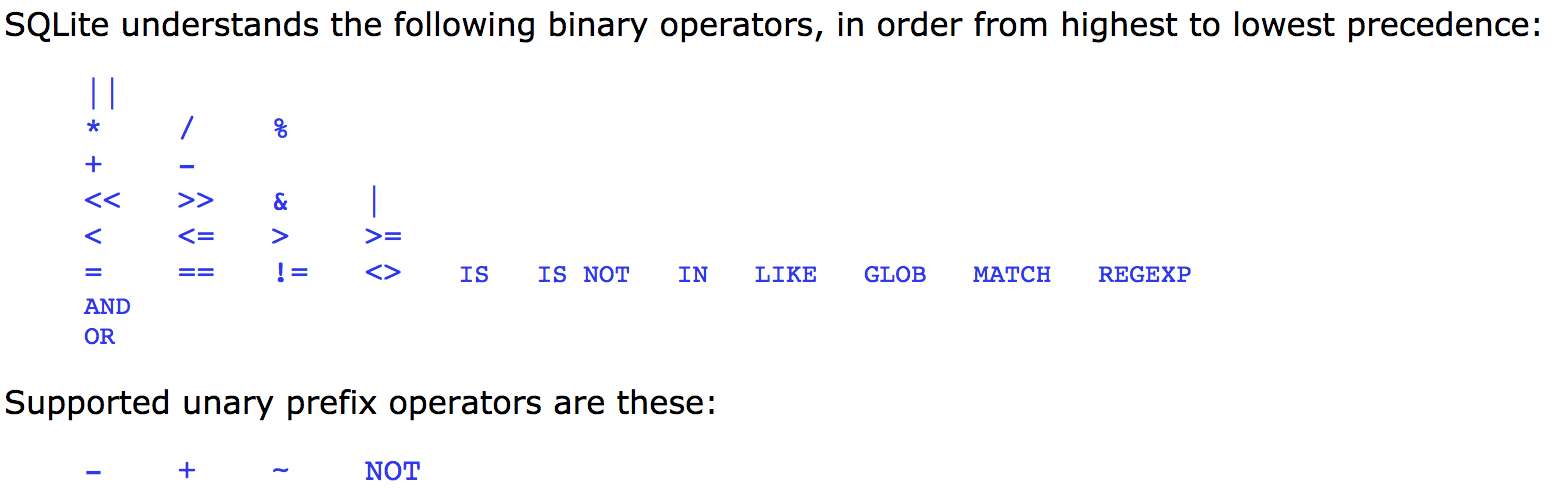

In [153]:
# back to sql 

# redo query but better the search 
# remove the word monomer, domain, complex
# add porin
# cross-reference with superfamily names (TBD)

# '*channel*' OR name GLOB '*porin*') AND (name GLOB '^'anion'*') # cant figure out negative.
import re
qr_text ="""

    SELECT *

    FROM protein
    WHERE (name LIKE '%channel%' OR name LIKE '%porin%') 
   

    """
df_query2 = pd.read_sql(qr_text, con=sql_db)
df_query2.head()
df_query2.shape

,id,family_id,species_id,membrane_id,pdbid,name,resolution,topology,thickness,thicknesserror,tilt,tilterror,gibbs,tau,numsubunits,numstrands,verification,comments,date_added
0,11,43,9,3,3pox,Porin OmpF,2.00,A in,24.0,0.8,0,0,-136.2,N.D.,3,48,Results are consistent with experimental hydro...,,2005-09-04
1,13,43,8,3,2fgq,Anion-selective porin,1.45,A in,25.0,0.9,0,0,-130.8,N.D.,3,48,,,2005-09-04
2,14,88,30,3,2por,Porin,1.80,A in,23.4,0.6,0,0,-114.8,N.D.,3,48,,,2005-09-04
3,15,88,33,3,3prn,Porin,1.90,A in,23.2,0.5,0,0,-127.6,N.D.,3,48,,,2005-09-04
4,16,44,9,3,1af6,Maltoporin,2.40,A in,25.1,0.7,0,0,-117.9,40,3,54,,,2005-09-04


(246, 19)

TO DO: get summary stats
    http://sebastianraschka.com/Articles/2014_sqlite_in_python_tutorial.html

In [154]:
df_query2['name']

0                                             Porin OmpF
1                                  Anion-selective porin
2                                                  Porin
3                                                  Porin
4                                             Maltoporin
5                                             Maltoporin
6                                 Sucrose-specific porin
7                                             Porin MspA
8      Mechanosensitive channel protein MscS, expande...
9            Mechanosensitive channel MscL, closed state
10                                           Aquaporin Z
11                                       Ammonia Channel
12                                Potassium channel KcsA
13                                Potassium channel KcsA
14             Potassium channel Kirbac1.1, closed state
15                 Potassium channel KvAP, sensor domain
16              Potassium channel KvAP, complex with Fab
17                             

In [156]:
# print localization of this subset.

To Do: get interactive dataframe https://github.com/quantopian/qgrid-notebooks/blob/master/index.ipynb